# Clone Repo

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive|
!ls /mydrive
!mkdir /mydrive/yolov7-custom
#Navigate to /mydrive/yolov4
%cd /mydrive/yolov7-custom

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'Colab Notebooks'      Timesheet-Adrian.gsheet	      yolov4
 dataset-full.zip      unlabeled		      yolov7-custom
 dataset-updated.zip   unlabeled.zip
'My Drive'	      'Untitled spreadsheet.gsheet'
mkdir: cannot create directory ‘/mydrive/yolov7-custom’: File exists
/content/gdrive/My Drive/yolov7-custom


In [ ]:
!git clone https://github.com/deshwalmahesh/yolov7-deepsort-tracking
%cd yolov7-deepsort-tracking

fatal: destination path 'yolov7-deepsort-tracking' already exists and is not an empty directory.
/content/gdrive/My Drive/yolov7-custom/yolov7-deepsort-tracking


In [ ]:
%cp ../weights/best.pt ./

# Imports

In [ ]:
%cp ../tracking_helper.py ./tracking_helpers.py

In [ ]:
from detection_helpers import *
from tracking_helpers import *
from  bridge_wrapper import *
from PIL import Image

# Detection

Fusing layers... 
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


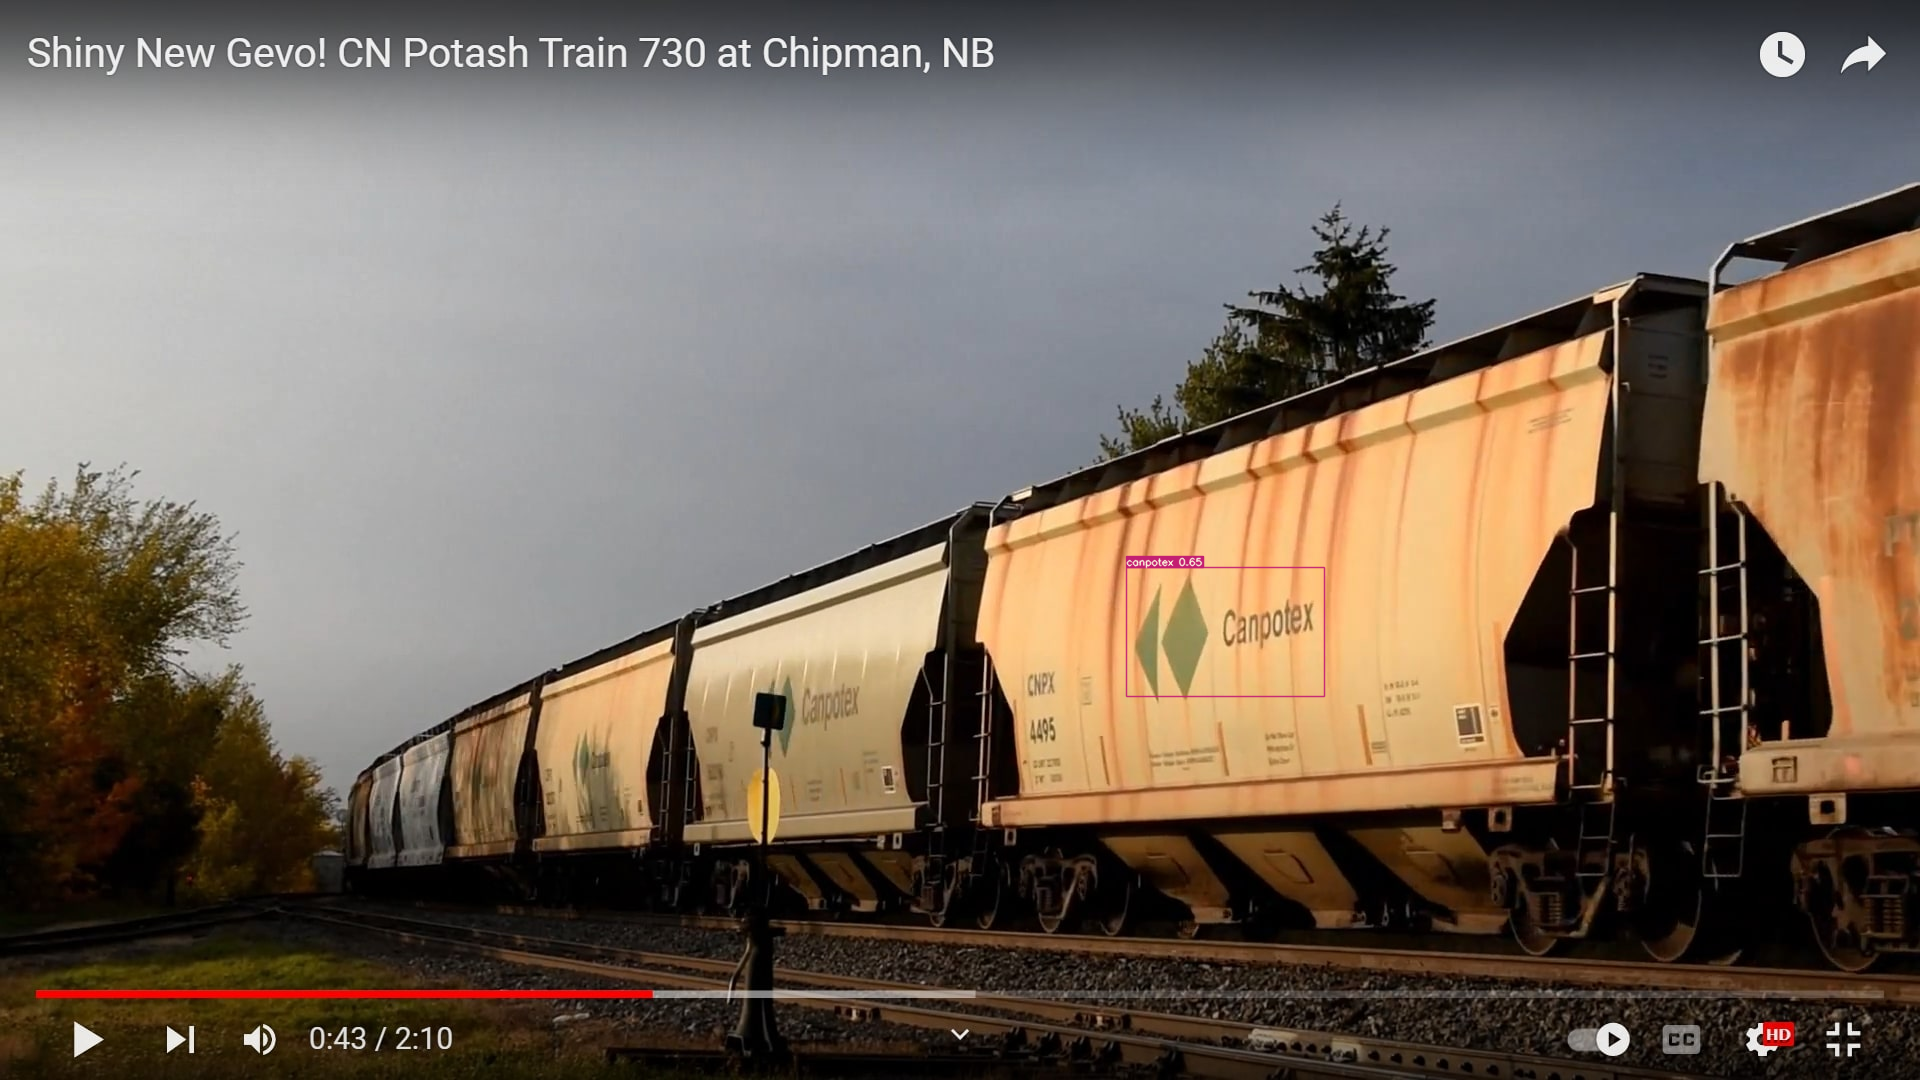

In [ ]:
detector = Detector() # it'll detect ONLY [person,horses,sports ball]. class = None means detect all classes. List info at: "data/coco.yaml"
detector.load_model('./best.pt',) # pass the path to the trained weight file


# Pass in any image path or Numpy Image using 'BGR' format
result = detector.detect('../hudson_images/Screenshot_20221102_014152.jpg', plot_bb = True) # plot_bb = False output the predictions as [x,y,w,h, confidence, class]


if len(result.shape) == 3:# If it is image, convert it to proper image. detector will give "BGR" image
    result = Image.fromarray(cv2.cvtColor(result,cv2.COLOR_BGR2RGB)) 
    
result

# Tracking
**NOTE: Colab won't show you the video using `OpenCV` here. So keep `show_live = False` on `Colab`**

You can save the `AVI` video first, convert it to `MP4` and then render it given the steps below. [Follow this link for conversion and display](https://stackoverflow.com/questions/60977179/how-to-play-avi-file-in-google-colab)

In [ ]:
# Initialise  class that binds detector and tracker in one class
tracker = YOLOv7_DeepSORT(reID_model_path="./deep_sort/model_weights/mars-small128.pb", detector=detector)

# output = None will not save the output video
tracker.track_video("../testvid/testvid_clear.mp4", output="./IO_data/output/output.avi", show_live = False, skip_frames = 0, count_objects = True, verbose=1)

Streaming output truncated to the last 5000 lines.
Processed frame no: 2309 || Current FPS: 34.78 || Objects tracked: 2
Processed frame no: 2310 || Current FPS: 17.26 || Objects tracked: 3
Processed frame no: 2311 || Current FPS: 21.47 || Objects tracked: 2
Processed frame no: 2312 || Current FPS: 36.3 || Objects tracked: 2
Processed frame no: 2313 || Current FPS: 38.69 || Objects tracked: 2
Processed frame no: 2314 || Current FPS: 32.16 || Objects tracked: 3
Processed frame no: 2315 || Current FPS: 22.52 || Objects tracked: 3
Processed frame no: 2316 || Current FPS: 18.34 || Objects tracked: 3
Processed frame no: 2317 || Current FPS: 21.56 || Objects tracked: 3
Processed frame no: 2318 || Current FPS: 18.03 || Objects tracked: 3
Processed frame no: 2319 || Current FPS: 25.69 || Objects tracked: 3
Processed frame no: 2320 || Current FPS: 19.16 || Objects tracked: 3
Processed frame no: 2321 || Current FPS: 31.34 || Objects tracked: 3
Processed frame no: 2322 || Current FPS: 31.44 || Obj

In [ ]:
%ls ./IO_data/output/

street.avi  video.mp4  videoplayback-output.avi


## Scripts for handling Videos on `Colab / Jupyter Notebook`

### Download a video from Youtube

In [ ]:
# ! pip install pytube
from pytube import YouTube 

link = "https://www.youtube.com/watch?v=kYIf8I1dvdo"
yt = YouTube(link)  

try:
    yt.streams.filter(progressive = True, file_extension = "mp4", resolution = "720p").first().download(output_path = "./", filename = "test.mp4",)
except Exception as e: print(e)

### Trim an existing video

In [ ]:
# ! pip install moviepy
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

ffmpeg_extract_subclip("test.mp4", 10, 100, targetname="trim.mp4") # trim from 10th second to 100th second

### Show an MP4 video Notebook

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('trim.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)